In [1]:
##importing supply train dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv("Downloads/supply_train.csv")

In [64]:
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [65]:
##data cleaning

In [66]:
##checking null values

In [67]:
df.isnull()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16616,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
16617,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16618,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [68]:
##checking sum of null values

In [69]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [72]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')
Numerical columns: Index(['Unnamed: 0', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [70]:
##removing unwanted columns

In [71]:
df["wh_owner_type"].value_counts()

wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64

In [74]:
df["approved_wh_govt_certificate"].value_counts()

approved_wh_govt_certificate
C     3638
B+    3260
B     3220
A     3132
A+    2771
Name: count, dtype: int64

In [76]:
cols_to_drop=['Unnamed: 0','wh_est_year','workers_num','approved_wh_govt_certificate','Ware_house_ID','WH_Manager_ID']

In [77]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
encoder = LabelEncoder()

# Fit and transform the 'Location_Type' column
df['Location_type'] = encoder.fit_transform(df['Location_type'])

In [80]:
df['WH_capacity_size'] = encoder.fit_transform(df['WH_capacity_size'])

In [81]:
df["zone"].value_counts()

zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64

In [82]:
df['zone'] = encoder.fit_transform(df['zone'])

In [83]:
df['WH_regional_zone'] = encoder.fit_transform(df['WH_regional_zone'])

In [84]:
df['wh_owner_type'] = encoder.fit_transform(df['wh_owner_type'])

In [85]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [21]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,13,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,4,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,17,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,17,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,0,0,0,240,14,0,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,0,0,1,164,17,0,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,1,0,1,211,24,1,5,29,28117
16618,0,2,3,5,3,2,3,5829,1,59,1,0,1,119,16,0,5,15,21103


In [22]:
##data analysis and visualisations

In [23]:
##checking total number of issues in warehouse

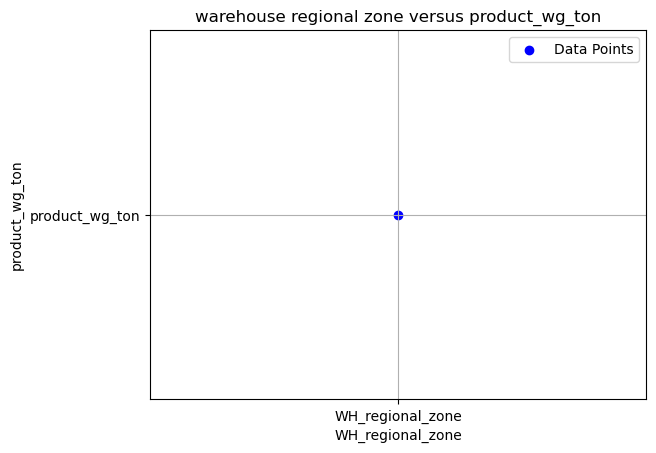

In [86]:
x=['WH_regional_zone']
y=['product_wg_ton']
plt.scatter(x, y, color='blue', marker='o', label='Data Points')
plt.xlabel('WH_regional_zone')
plt.ylabel('product_wg_ton')
plt.title('warehouse regional zone versus product_wg_ton')
plt.legend()
plt.grid(True)
plt.show()

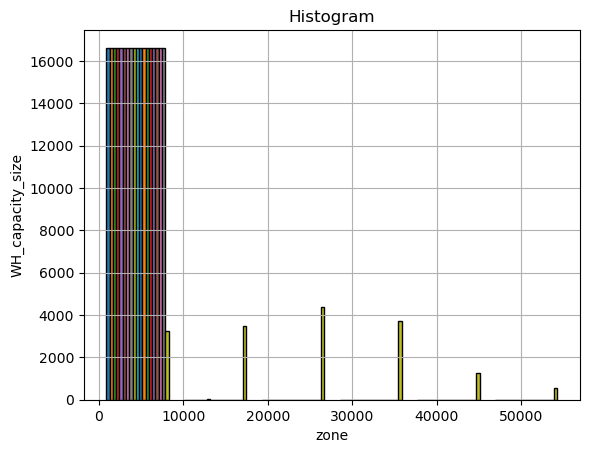

In [87]:
plt.hist(df, bins=6, edgecolor='black')
plt.xlabel('zone')
plt.ylabel('WH_capacity_size')
plt.title('Histogram')
plt.grid(True)
plt.show()

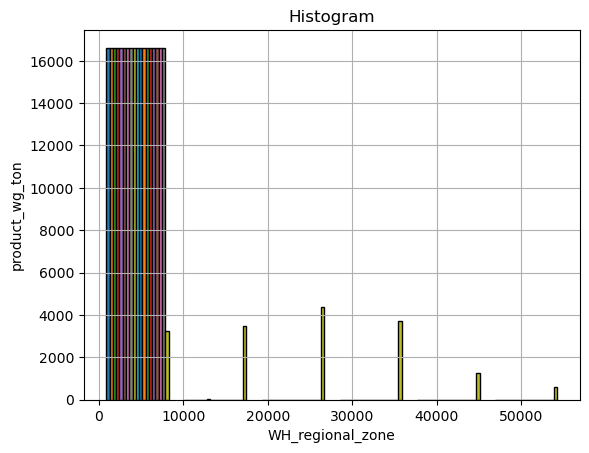

In [88]:
plt.hist(df, bins=6, edgecolor='black')
plt.xlabel('WH_regional_zone')
plt.ylabel('product_wg_ton')
plt.title('Histogram')
plt.grid(True)
plt.show()

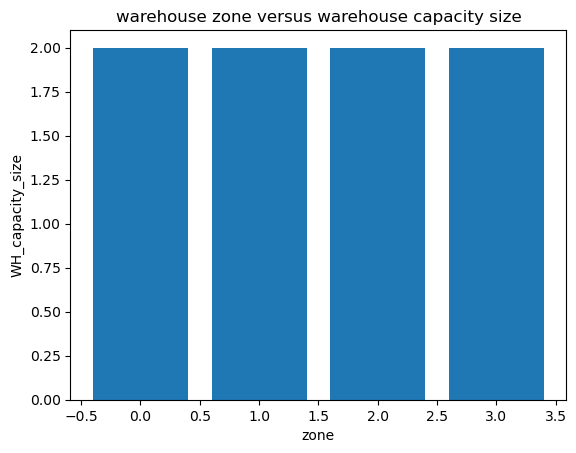

In [89]:
x =df['zone'] 
y =df['WH_capacity_size']
plt.bar(x,y)
plt.xlabel('zone')
plt.ylabel('WH_capacity_size')
plt.title('warehouse zone versus warehouse capacity size')
plt.show()

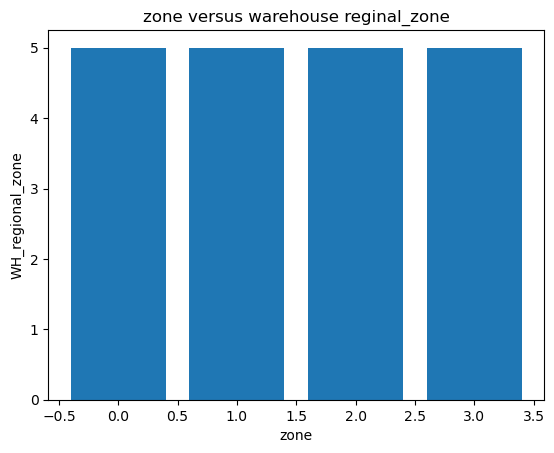

In [90]:
x =df['zone'] 
y =df['WH_regional_zone']
plt.bar(x,y)
plt.xlabel('zone')
plt.ylabel('WH_regional_zone')
plt.title('zone versus warehouse reginal_zone')
plt.show()

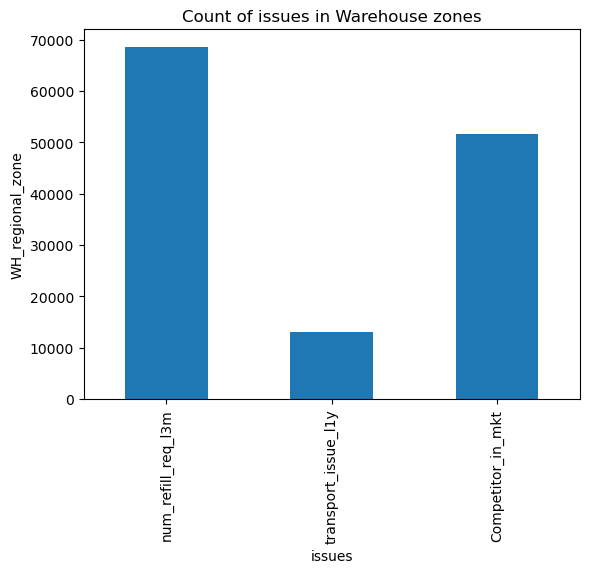

In [91]:
issues_count = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt']
column_sums = df[issues_count].sum().plot(kind='bar')
plt.xlabel("issues")
plt.ylabel("WH_regional_zone")
plt.title("Count of issues in Warehouse zones")  
plt.show()

In [92]:
region=df.groupby(by='WH_regional_zone').sum()
region.head


<bound method NDFrame.head of                   Location_type  WH_capacity_size  zone  num_refill_req_l3m  \
WH_regional_zone                                                              
0                            84              2668  2340                5342   
1                           167              1998  3862                8329   
2                           163              1937  3781                8065   
3                           246              2756  5868               11406   
4                           236                 0  5661               12412   
5                           452              3704  9694               23031   

                  transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
WH_regional_zone                                                            
0                                1089               4124          6927328   
1                                1440               5754         10036204   
2                            

In [93]:
##warehouse regional zones versus retail shop numbers

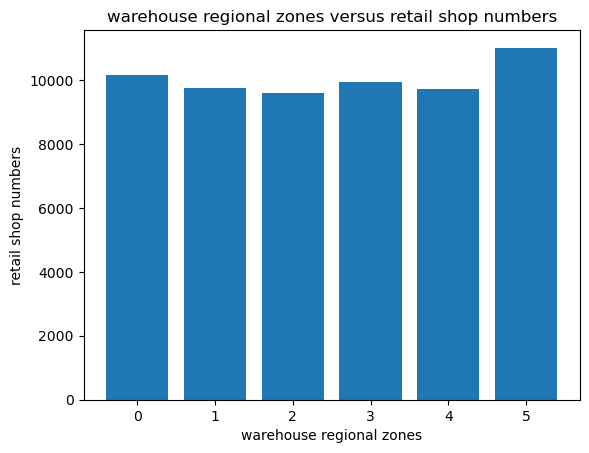

In [94]:
x =df['WH_regional_zone'] 
y =df['retail_shop_num']
plt.bar(x,y)
plt.xlabel('warehouse regional zones')
plt.ylabel('retail shop numbers')
plt.title('warehouse regional zones versus retail shop numbers')
plt.show()

In [95]:
##warehouse regional zones vs sum of distributors

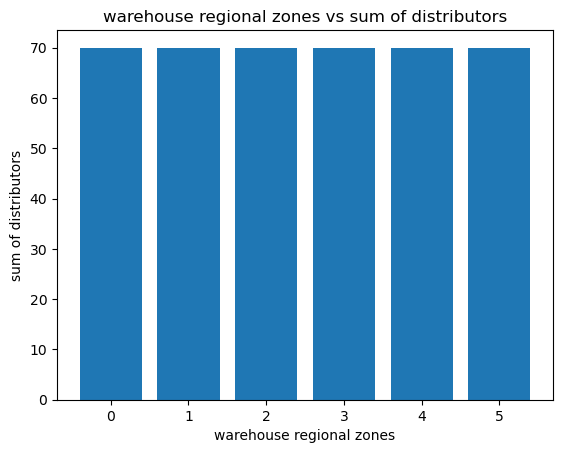

In [96]:
x = df['WH_regional_zone']
y = df['distributor_num']
plt.bar(x,y)
plt.xlabel('warehouse regional zones')
plt.ylabel('sum of distributors')
plt.title('warehouse regional zones vs sum of distributors')
plt.show()

In [97]:
##storage issues reported in warehouse zones

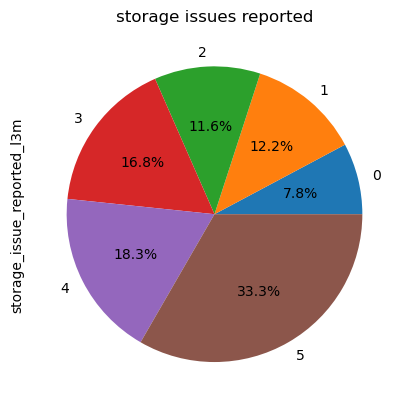

In [98]:
region['storage_issue_reported_l3m'].plot(kind='pie', autopct='%1.1f%%')
plt.title('storage issues reported')
plt.show()

In [99]:
##total product weight in ton

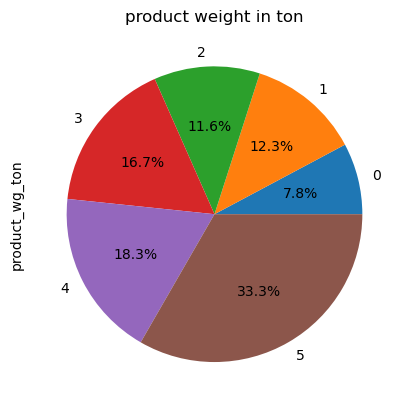

In [100]:
region['product_wg_ton'].plot(kind='pie', autopct='%1.1f%%')
plt.title('product weight in ton')
plt.show()

In [101]:
##flood impacted in warehouse zones

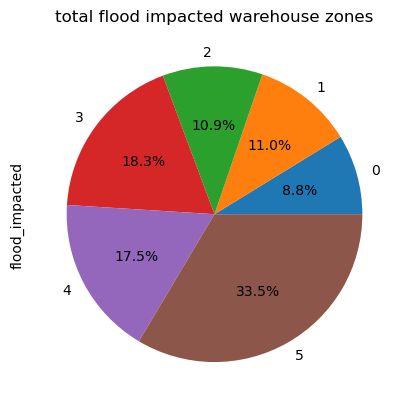

In [102]:
region['flood_impacted'].plot(kind='pie', autopct='%1.1f%%')
plt.title('total flood impacted warehouse zones')
plt.show()

In [103]:
##flood proofed warehouse zones

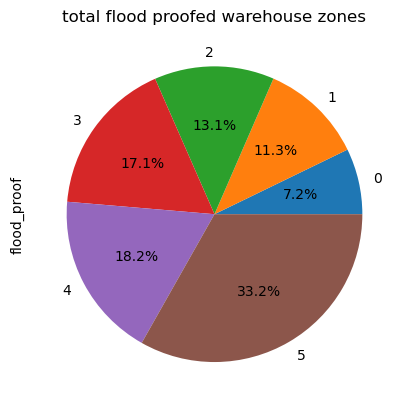

In [104]:
region['flood_proof'].plot(kind='pie', autopct='%1.1f%%')
plt.title('total flood proofed warehouse zones')
plt.show()

In [105]:
##electric supplied warehouse zones]

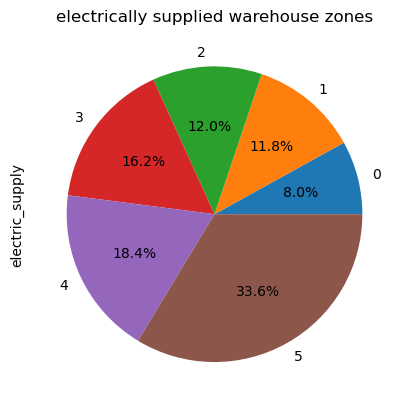

In [106]:
region['electric_supply'].plot(kind='pie', autopct='%1.1f%%')
plt.title('electrically supplied warehouse zones')
plt.show()

In [107]:
##warehouse regional zones vs total distance from hub

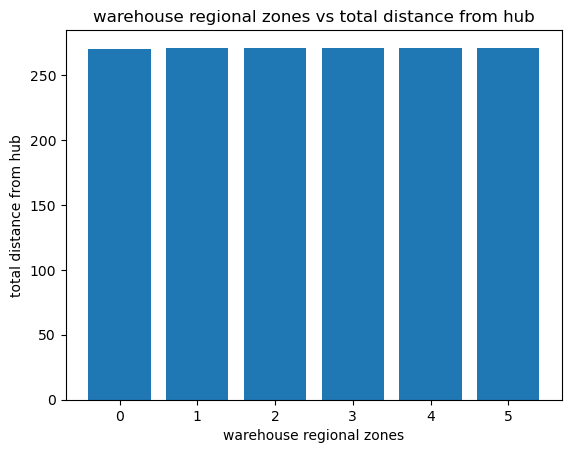

In [108]:
x = df['WH_regional_zone']
y = df['dist_from_hub']
plt.bar(x,y)
plt.xlabel('warehouse regional zones')
plt.ylabel('total distance from hub')
plt.title('warehouse regional zones vs total distance from hub')
plt.show()

In [109]:
##other facilities in warehouse

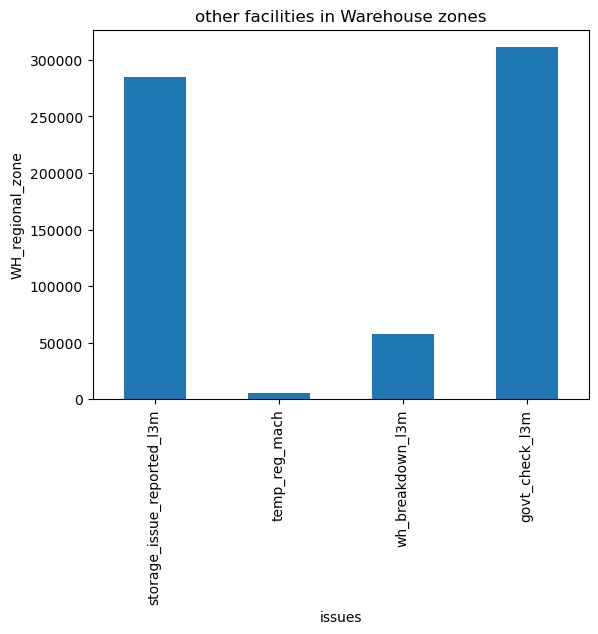

In [110]:
issues_count = ['storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','govt_check_l3m']
column_sums = df[issues_count].sum().plot(kind='bar')
plt.xlabel("issues")
plt.ylabel("WH_regional_zone")
plt.title("other facilities in Warehouse zones")  
plt.show()

In [49]:
##model implementation

In [ ]:
# Importing necessary libraries

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [112]:
#splitting the dataset into X and y

In [113]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [116]:
#initialize models

In [149]:
models = {
       'Linear Regression': LinearRegression(),
       'Gradient Boosting': GradientBoostingRegressor(),
       'Random Forest': RandomForestRegressor(),
       'SVR': SVR(),
       'KNN': KNeighborsRegressor()
}

In [118]:
#the models dictionary and fits each model 

In [119]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
#calculate the Root Mean Squared Error and R^2
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print(f"{name}:RMSE={rmse},R^2={r2}")

Linear Regression:RMSE=1760.31739085536,R^2=0.9771808245845728
Gradient Boosting:RMSE=1343.051876376308,R^2=0.9867167739428346
Random Forest:RMSE=1412.7582974202146,R^2=0.9853021530366429
SVR:RMSE=11438.628891398299,R^2=0.03646847582582724
KNN:RMSE=5478.399193333418,R^2=0.7789831742933792


In [ ]:
#loading test dataset

In [120]:
df1=pd.read_csv('Downloads/supply_test.csv')

In [ ]:
#data cleaning

In [121]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index([], dtype='object')
Numerical columns: Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [122]:
cols_to_drop=['Unnamed: 0','wh_est_year','workers_num','approved_wh_govt_certificate','Ware_house_ID', 'WH_Manager_ID']

In [123]:
df1.drop(cols_to_drop,axis=1,inplace=True)

In [124]:
encoder = LabelEncoder()
df1['Location_type'] = encoder.fit_transform(df1['Location_type'])

In [125]:
df1['WH_capacity_size'] = encoder.fit_transform(df1['WH_capacity_size'])

In [126]:
df1['zone'] = encoder.fit_transform(df1['zone'])

In [127]:
df1['WH_regional_zone'] = encoder.fit_transform(df1['WH_regional_zone'])

In [128]:
df1['wh_owner_type'] = encoder.fit_transform(df1['wh_owner_type'])

In [129]:
nan_values = df1.isna().sum().sum()
print("Total NaN values in the dataset:", nan_values)

Total NaN values in the dataset: 0


In [144]:
import pickle 

In [145]:
model_name="supply_chain_model"

In [146]:
with open('supply_chain_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('supply_chain_model.pkl','rb')as file:
  models_dict = pkl.load(file)

In [165]:
models = {
       'Linear Regression': LinearRegression(),
       'Gradient Boosting': GradientBoostingRegressor(),
       'Random Forest': RandomForestRegressor(),
       'SVR': SVR(),
       'KNN': KNeighborsRegressor()}

In [181]:
  models = models_dict["models"]
  scaler = models_dict["scaler"]

TypeError: 'KNeighborsRegressor' object is not subscriptable